In [10]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [11]:
def calc_order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))

    


out_str = "/extra2/knopf/vmodel_output/noPred_/"
saveLoc = "/extra2/knopf/vmodel_output/"
saveName = "noPred_"


args = {
'nprey': 100,
'npred': 1,
'frange': 10,
'fstr': 0.0,
'visPred': 300.0,
'visPrey': 330,
'astr': 3.0,
'dphi': 0.2,
'repPrey': 3,
'repRadPrey': 1.5,
'repPred': 1,
'repRadPred': 20,
'attPrey': 3,
'attRadPrey': 1.5,
'repCol': 10000000,
'hstr': 1,
'steps': 1500,
    }



paraChange1_name = "astr"
paraChange2_name = "dphi"
steps = 1
reps = 1

total = steps*steps*reps

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol_scan = np.zeros((steps, steps))
IID_scan = np.zeros((steps, steps))
CND_scan = np.zeros((steps, steps))

time_now = datetime.datetime.now()
time_elapsed = 0


for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):

        #np.savetxt(str(saveLoc)+""+str(saveName)+"pol_"+str(paraChange1_name)+"_"+str(paraChange2_name)+".csv", pol_scan, delimiter=",")
  
        pol_reps = []
        IID_reps = []
        CND_reps = []
        
        args[paraChange1_name] = paraChange1_val[i]
        args[paraChange2_name] = paraChange2_val[j]

        npred = args["npred"]
        nprey = args["nprey"]

        args_str = '_'.join(f'{k}_{v}' for k, v in args.items())

        #file_h5 = f'{out_str}_{args_str}.states.nc'
        #file_h5 = f'/home/lars/vmodel_output/_nprey_100_npred_1_frange_10_fstr_0.0_visPred_90.0_visPrey_330_astr_3_dphi_0.2_repPrey_3_repRadPrey_1_repPred_1_repRadPred_20_attPrey_3_attRadPrey_1_repCol_10000000_hstr_1_steps_50000.states.nc'
        file_h5 = f'/home/lars/vmodel_output/_nprey_100_npred_1_frange_10_fstr_0.0_visPred_300.0_visPrey_330_astr_1.7368421052631577_dphi_0.15789473684210525_repPrey_3_repRadPrey_1.5_repPred_1_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_1500.states.nc'
        
        #file_h5 = f'/home/lars/vmodel_output/_nprey_100_npred_1_frange_10_fstr_0.0_visPred_300.0_visPrey_330_astr_2.6842105263157894_dphi_0.15789473684210525_repPrey_3_repRadPrey_1.5_repPred_1_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_1500.states.nc' 

        #print(file_h5)
        


        try:
            with h5py.File(file_h5) as fh5:
                vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[:,:,:,:]
                pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[:,:,:,:]

        except:
            print("File not Found, going on")
        
        

        for rep in range(reps):
            rep = 0
            
            vel_rep = vel[rep,:,:,:]
            pos_rep = pos[rep,:,:,:]


            #print(np.shape(vel_rep))


            pol = []
            IID = []
            CND = []
            elon= []
            
            predTime = 2
            for ii in range(1300,args["steps"]-predTime):
                pol.append(calc_order(vel_rep[ii,:nprey,:]))
                pos_calc = pos_rep[ii,:nprey,:]
                dist = scipy.spatial.distance.cdist(pos_calc,pos_calc)
                IID.append(dist.sum() / (nprey * (nprey - 1)))
                dist[dist==0]=100
                CND.append(np.mean(dist.min(axis=1)))
                elon.append(get_elongation(pos_rep[ii,:nprey,:],vel_rep[ii,:nprey,:]))
                
                
                
            pol_reps.append(np.mean(pol))
            IID_reps.append(np.mean(IID))
            CND_reps.append(np.mean(CND))
            
            
        time_last = time_now
            
        time_now = datetime.datetime.now()
            
        time_diff = np.round((time_now-time_last).total_seconds(),2)
            
        time_elapsed += time_diff

        progress = rep+reps*(j+i*steps)
            
        time_finish = (time_elapsed/progress) * (total - progress)
            
        print("progress: "+str(np.round(100*progress/total,2))+" %, time running: "+str(np.round(time_elapsed,2))+" s, est. finish: "+str(np.round(time_finish/60,2))+" min.")
            
            
        pol_scan[i,j] = np.mean(pol_reps)
        IID_scan[i,j] = np.mean(IID_reps)
        CND_scan[i,j] = np.mean(CND_reps)

NameError: name 'get_elongation' is not defined

In [ ]:
test = np.mean(vel_rep[1,:,:], axis=0)
test.min()

In [ ]:
elon

In [ ]:
get_elongation(pos_rep[ii,:nprey,:],vel_rep[ii,:nprey,:])

In [ ]:
def get_elongation(pos, vel):
    meanDir = np.mean(vel, axis=0)
    meanDir = meanDir / np.linalg.norm(meanDir)
    
    p_meanDir= np.zeros(2)
    p_meanDir[0] = meanDir[1]
    p_meanDir[1] = -meanDir[0]
    
    dist = []
    p_dist = []
    
    for i in range(len(pos[:,0])):
        
        dist.append(pos[i,0] * meanDir[0] + pos[i,1] * meanDir[1])
        p_dist.append(pos[i,0] * p_meanDir[0] + pos[i,1] * p_meanDir[1])
    

    elongation = (np.array(dist).max()-np.array(dist).min()) / (np.array(p_dist).max()-np.array(p_dist).min())
    return elongation

In [ ]:
double get_elongation(std::vector<particle> &a, std::vector<double> &dir, std::vector<int> &nodes){
    std::vector<double> p_dir(2, 0); // defines perpendicular direction
    double len = vec_length(dir);
    std::vector<double> cdir = dir;
    cdir[0] /= len;
    cdir[1] /= len;
    p_dir[0] = cdir[1];
    p_dir[1] = -cdir[0];
    double min, max, p_min, p_max, dist, p_dist;
    int ii = 0;
    min = p_min = std::numeric_limits<double>::max();
    max = p_max = std::numeric_limits<double>::lowest();
    dist = p_dist = 0;
    for(int i=0; i<nodes.size(); i++){
        ii = nodes[i];
        dist = a[ii].x[0] * cdir[0] + a[ii].x[1] * cdir[1];
        p_dist = a[ii].x[0] * p_dir[0] + a[ii].x[1] * p_dir[1];
        min = fmin(min, dist);
        max = fmax(max, dist);
        p_min = fmin(p_min, p_dist);
        p_max = fmax(p_max, p_dist);
    }
    double elongation = (max - min) / (p_max - p_min);
    return fabs(elongation);

In [ ]:
np.shape(pos)

In [ ]:
def get_angle(x1,y1,x2,y2):
    myradians = math.atan2(y1-y2, x1-x2)
    mydegrees = math.degrees(myradians)
    return mydegrees

import matplotlib.pyplot as plt

In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [ ]:
class Vect:

   def __init__(self, a, b):
        self.a = a
        self.b = b

   def findClockwiseAngle(self, other):
       # using cross-product formula
       return -math.degrees(math.asin((self.a * other.b - self.b * other.a)/(self.length()*other.length())))
       # the dot-product formula, left here just for comparison (does not return angles in the desired range)
       # return math.degrees(math.acos((self.a * other.a + self.b * other.b)/(self.length()*other.length())))

   def length(self):
       return math.sqrt(self.a**2 + self.b**2)

In [ ]:
get_angle(0,-1,1,0)

In [ ]:
vector1 = Vect(0,1)
vector2 = Vect(1,0)
vector1.findClockwiseAngle(vector2)

In [ ]:
angle_between((0,-1),(1,0))

In [ ]:
rep = 0
vel_rep = vel[rep,:,:nprey,:]
pos_rep = pos[rep,:,:nprey,:]

time, N, dim = np.shape(pos_rep)
com_pos = np.zeros((time,2))
angle_time = []
angle_time_full = np.zeros((time, N, 2))

for i in range(time):
    com_pos[i] = np.mean(pos_rep[i,:,0]),np.mean(pos_rep[i,:,1])
    dir_com = com_pos[i] - pos_rep[i,:,:]
    
    angle = 0
    for j in range(nprey):
        vector2 = Vect(dir_com[j,0],dir_com[j,1])
        vector1 = Vect(vel_rep[i,j,0],vel_rep[i,j,1])
        angle_i = vector1.findClockwiseAngle(vector2)
        
        angle += angle_i
        angle_time_full[i, j, :] = angle_i
        
    angle_time.append(angle/nprey)

In [ ]:
angle_time_mill = np.copy(angle_time)
af_mill = np.copy(angle_time_full)

In [ ]:
vec1 = Vect(-0.22825414545146633,4.411833004127907)
vec2 = Vect(0.9986643325913226,0.041667695999804114)












try:
    vec1.findClockwiseAngle(vec2)
except:
    print("ERR")

In [ ]:
vec1.findClockwiseAngle(vec2)

In [ ]:
plt.plot(angle_time_swarm)
plt.plot(angle_time_mill)

In [ ]:
af_swarm[800,:,0]

In [ ]:
af_mill[1400,:,0]

In [ ]:
test = np.zeros((10, 10, 10, 10))
np.save("test.csv", test)

In [ ]:
paraChange1_val

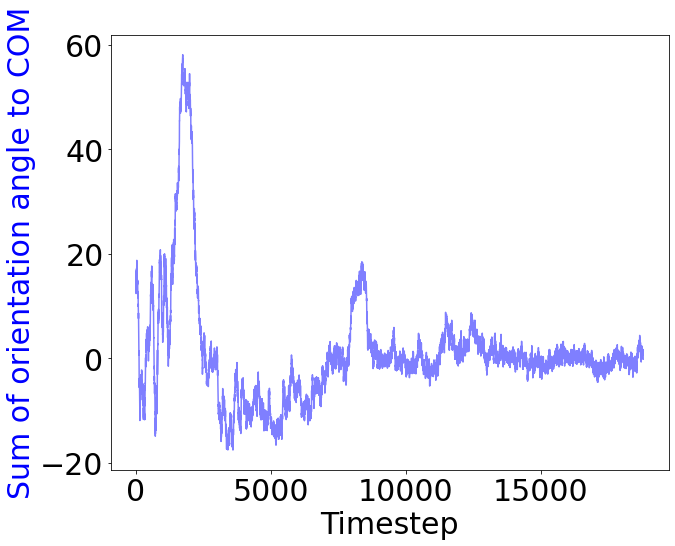

In [11]:
import matplotlib.pyplot as plt
import numpy as np

mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_mill3_astr_visPrey.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")
elong = np.load("/home/lars/vmodel_output/single_mill_longsim_elong_astr_dphi.npy")

fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 5
astr = 6
dphi = 5

steps, steps, reps, time = np.shape(mill)
x = range(time-1)

elong_over = np.copy(elong)
elong_under = np.copy(elong)
elong_over[elong_over < 1] = 1
elong_under[elong_under > 1] = 1

elong_over = -1/elong_over+2

line1 = np.zeros(time)+1

#ax2 = ax1.twinx()
ax1.plot(x, (mill[astr,dphi,rep,1:]-90), 'b-', alpha = 0.5)
#ax2.plot(x, elong_over[astr,dphi,rep,1:], color = "r", alpha=0.5)
#ax2.plot(x, elong_under[astr,dphi,rep,1:], 'c-', alpha=0.5)
#ax2.plot(x, line1[1:])

ax1.set_xlabel('Timestep')
#ax1.set_ylim(-50,50)
#ax2.set_ylim(0,2)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
#ax2.set_ylabel('Elongation', color='c')

plt.rcParams.update({'font.size': 30})
name = "timeseries_elong_mill"
plt.gcf().set_size_inches(10,8)
plt.savefig(str(name)+".pdf",bbox_inches="tight")




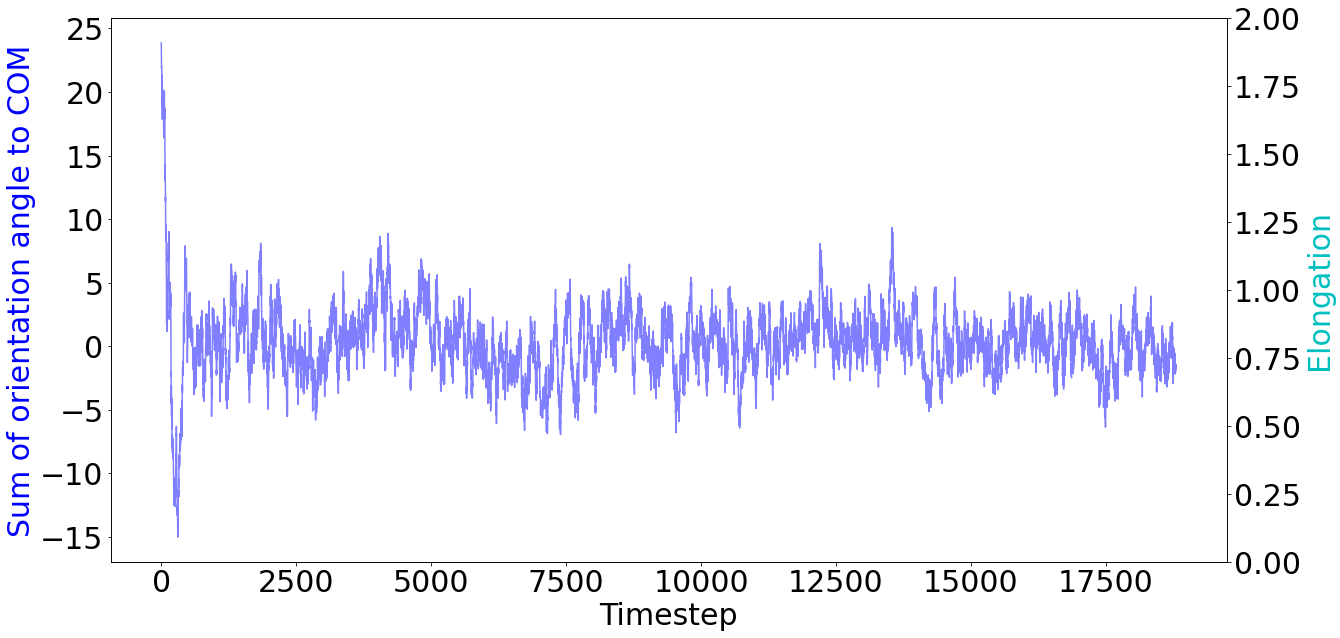

In [4]:
import matplotlib.pyplot as plt
import numpy as np

mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_mill_astr_visPrey.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")
elong = np.load("/home/lars/vmodel_output/single_mill_longsim_elong_astr_dphi.npy")

fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 9
astr = 4
dphi = 5

steps, steps, reps, time = np.shape(mill)
x = range(time-1)

elong_over = np.copy(elong)
elong_under = np.copy(elong)
elong_over[elong_over < 1] = 1
elong_under[elong_under > 1] = 1

elong_over = -1/elong_over+2

line1 = np.zeros(time)+1

ax2 = ax1.twinx()
ax1.plot(x, (mill[astr,dphi,rep,1:]), 'b-', alpha = 0.5)
#ax2.plot(x, elong_over[astr,dphi,rep,1:], color = "r", alpha=0.5)
#ax2.plot(x, elong_under[astr,dphi,rep,1:], 'c-', alpha=0.5)
#ax2.plot(x, line1[1:])

ax1.set_xlabel('Timestep')
#ax1.set_ylim(-50,50)
ax2.set_ylim(0,2)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('Elongation', color='c')

plt.rcParams.update({'font.size': 30})
name = "timeseries_elong_mill"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".png",bbox_inches="tight")




In [3]:
mill[astr,dphi,rep,1:]

array([88.03809006, 87.52537955, 87.02210235, ..., 86.37959173,
       86.36599178, 86.57923488])

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 5

astr = 5
dphi = 1

steps, steps, reps, time = np.shape(mill)
x = range(time)

ax2 = ax1.twinx()
ax1.plot(x, mill[astr,dphi,rep,:], 'b-', alpha = 0.5)
ax2.plot(x, pol[astr,dphi,rep,:], color = "r", alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(-50,50)
ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('Polarization', color='c')

plt.rcParams.update({'font.size': 50})

name = "timeseries_pol_mill"
plt.savefig("/home/lars/vmodel_output/"+str(name)+".png",bbox_inches="tight")

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(20,10))

rep = 3

astr = 3
dphi = 2

steps, steps, reps, time = np.shape(mill)
x = range(time)

ax2 = ax1.twinx()
ax1.plot(x, mill[astr,dphi,rep,:], 'b-', alpha = 0.5)
ax2.plot(x, pol[astr,dphi,rep,:], 'c-', alpha=0.5)

ax1.set_xlabel('Timestep')
ax1.set_ylim(-50,50)
ax2.set_ylim(0,1)
ax1.set_ylabel('Sum of orientation angle to COM', color='b')
ax2.set_ylabel('Polarization', color='c')

plt.rcParams.update({'font.size': 22})

plt.show()

In [ ]:
np.shape(mill)

In [ ]:



mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

paraChange1_name = "astr"
paraChange2_name = "dphi"
steps = 10
reps = 20

matplotlib.use("Agg")

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):

        


        
        for rep in range(reps):
            
            #fig.clf()
            fig, ax1 = plt.subplots(1,1, figsize=(20,10))
            steps, steps, reps, time = np.shape(mill)
            x = range(time)

            ax2 = ax1.twinx()
            
            ax1.plot(x, mill[i,j,rep,:], 'b-', alpha = 0.3)
            ax2.plot(x, elong_over[astr,dphi,rep,:], color = "r", alpha=0.3)
            ax2.plot(x, elong_under[astr,dphi,rep,:], 'c-', alpha=0.3)
            ax2.plot(x, line1)

            ax1.set_xlabel('Timestep')
            ax1.set_ylim(-50,50)
            ax2.set_ylim(0,2)
            ax1.set_ylabel('Milling', color='b')
            ax2.set_ylabel('Elongation', color='c')

            plt.rcParams.update({'font.size': 22})

            #plt.show()
            plt.savefig("mill-elong_"+str(paraChange1_name)+"="+str(paraChange1_val[i])+"_"+str(paraChange2_name)+"="+str(paraChange2_val[j])+"_rep="+str(rep)+".png", facecolor="w")
            plt.close(fig)
            plt.clf()
            fig.clf()

In [ ]:
import seaborn as sns; sns.set_theme()
import pandas as pd

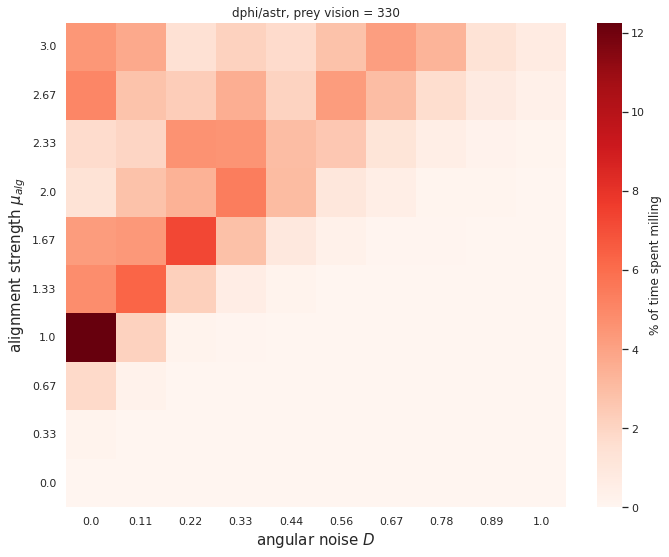

In [12]:

mill = np.load("/home/lars/vmodel_output/test_mill_longsim_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("dphi/astr, prey vision = 330")
plt.savefig("HM_mill_dphi_vis330.png",bbox_inches="tight")

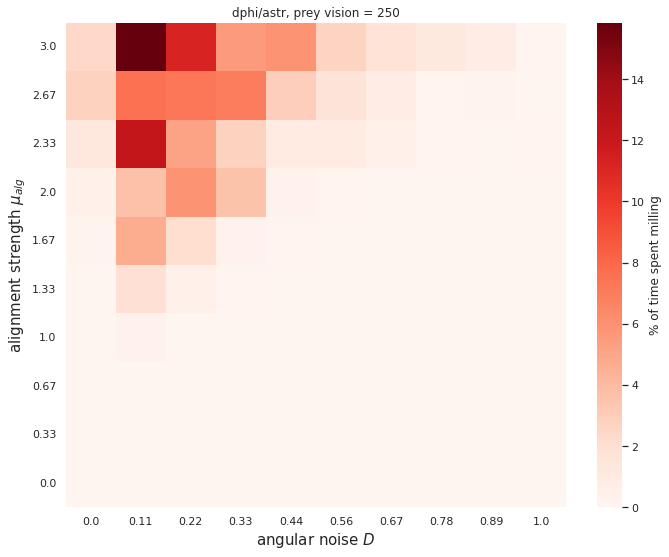

In [14]:

mill = np.load("/home/lars/vmodel_output/longsim_preyvis250_dphi_astr_occ_col_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/longsim_preyvis250_dphi_astr_occ_col_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("dphi/astr, prey vision = 250")
plt.savefig("HM_mill_dphi_vis250.png",bbox_inches="tight")

Text(0.5, 1.0, 'dphi/astr, prey vision = 240')

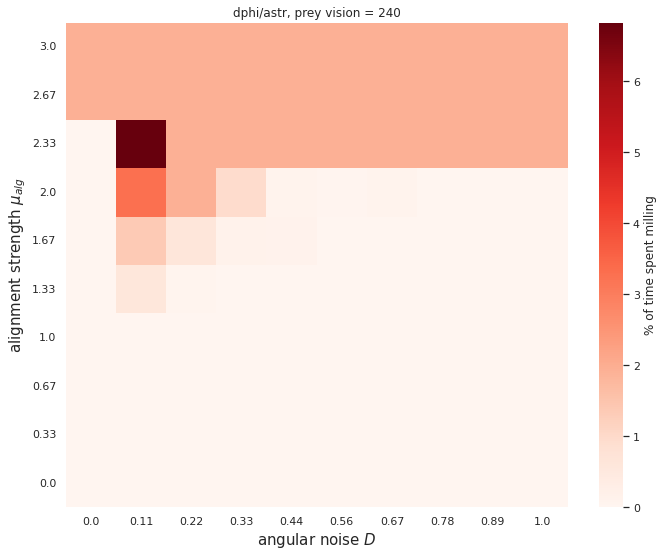

In [15]:

mill = np.load("/home/lars/vmodel_output/longsim_preyvis240_dphi_astr_occ_col_mill_astr_dphi.npy")
pol = np.load("/home/lars/vmodel_output/longsim_preyvis240_dphi_astr_occ_col_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("dphi/astr, prey vision = 240")

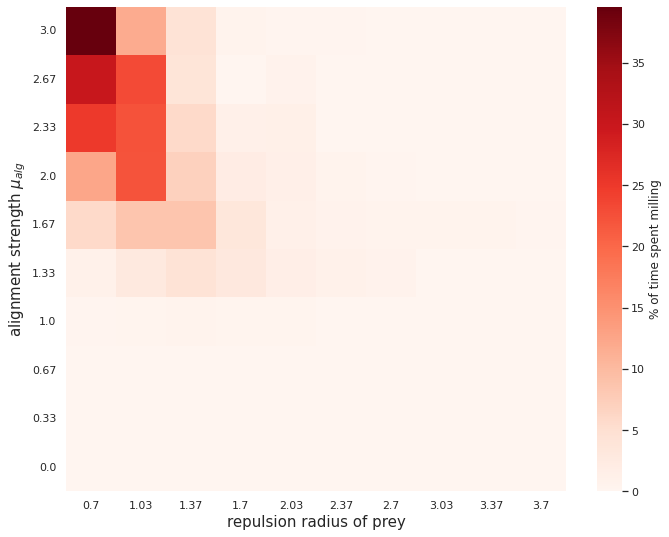

In [16]:

mill = np.load("/home/lars/vmodel_output/longsim_reprad_astr_mill_astr_repRadPrey.npy")
pol = np.load("/home/lars/vmodel_output/longsim_reprad_astr_pol_astr_repRadPrey.npy")

steps = 10
reps = 20
paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0.7,3.7,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
            



name = "HM_mill_occ_col_radius"

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("repulsion radius of prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.savefig("/home/lars/vmodel_output/"+str(name)+".png",bbox_inches="tight")
plt.savefig("HM_mill_reprad_vis330.png",bbox_inches="tight")

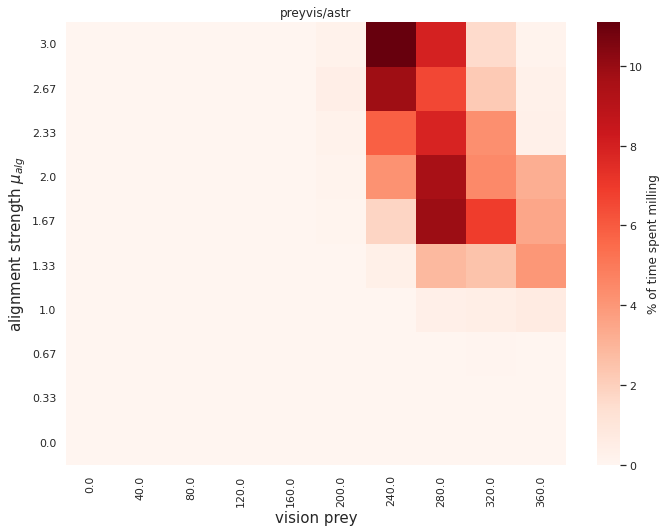

In [17]:

mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_noCol_mill_astr_visPrey.npy")
pol = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_noCol_pol_astr_visPrey.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<30] = 0
mill_abs[mill_abs>=30] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, cbar_kws={'label': "% of time spent milling"},
                 cmap="Reds")

plt.tight_layout()
plt.gcf().set_size_inches(10,7.85)
plt.xlabel("vision prey", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("preyvis/astr")
plt.savefig("HM_mill_vis.png",bbox_inches="tight")